# DSP 556 Assignment 6: Neural Networks

### Sheikh-sedat Touray

#### Spring 2023

In [54]:
# Install tensorflow
!pip install tensorflow



In [55]:
#Importing librabries
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
#Importing the tensor flow libraries

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [51]:
# Import the dataset from sci-kit learn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data.astype('float32') / 255.0
y = mnist.target.astype('int')
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784) (70000,)


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define a function to create and train an MLPClassifier with variable hidden layers
def train_mlp(hidden_layer_sizes):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [ ]:
# Experiment with different numbers of hidden layers
hidden_layers_options = [
    (10,),                  # Single hidden layer with 10 neurons
    (10, 5),               # Two hidden layers with 10 and 5 neurons
]

for hidden_layers in hidden_layers_options:
    accuracy = train_mlp(hidden_layers)
    print(f"Hidden Layers of MLP: {hidden_layers}, Accuracy of MLP: {accuracy}")

Hidden Layers of MLP: (10,), Accuracy of MLP: 0.9307142857142857
Hidden Layers of MLP: (10, 5), Accuracy of MLP: 0.9216428571428571


As anticipated since this is a huge data and large number of observation it took about 2 mins for the first layer to complete training and the second layer with more neurons even took longer, however, it did not improve prediction accuracy. So in the next step I am going to choose more hidden layers and more neurons. Although it is going to take a while considering the size of the data. I just think it would be more intersting to see the whole picture.

In [ ]:
# Experiment with different numbers of hidden layers
hidden_layers_options = [
    (50,),                  # Single hidden layer with 50 neurons
    (50, 30),               # Two hidden layers with 50 and 30 neurons
    (50, 30, 20),           # Three hidden layers with 50, 30, and 20 neurons
]

for hidden_layers in hidden_layers_options:
    accuracy = train_mlp(hidden_layers)
    print(f"Hidden Layers of MLP: {hidden_layers}, Accuracy of MLP: {accuracy}")

Hidden Layers of MLP: (50,), Accuracy of MLP: 0.9700714285714286
Hidden Layers of MLP: (50, 30), Accuracy of MLP: 0.9691428571428572
Hidden Layers of MLP: (50, 30, 20), Accuracy of MLP: 0.9691428571428572


As anticipated the large number of neurons that I chose for the single layer made it take a relatively long time to finish training. It even took longer with the second hidden layer with two neurons of size 50 and 30 neurons and the third hidden layer took the longest to train with with 3 neurons. However every time I increased the neurons and the hidden layers, the accuracy also increases. It took about a total of 10 mins

# Using Tensor Flow to build a MLP Neural Network

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the model
model1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # Flatten the input images
    layers.Dense(128, activation='relu'),    # Hidden layer 1 with 128 units and ReLU activation
    layers.Dense(64, activation='relu'),     # Hidden layer 2 with 64 units and ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with 10 units (for 10 digits) and softmax activation
])

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model1.summary()


11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train the model
model1.fit(train_images, train_labels, epochs=5)
print("\n")
# Evaluate the model
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
print("\n")
print(f"Test accuracy of Tensor Flow MLP: {test_acc1}")





Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2368 - accuracy: 0.9298
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0996 - accuracy: 0.9709
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0704 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0533 - accuracy: 0.9831
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0428 - accuracy: 0.9861


313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9740


Test accuracy of Tensor Flow MLP: 0.9739999771118164


After 8 secs the 5th epoch gave the lowest loss and highest accuracy and after performing a prediction you can see that the test accuracy is slightly less than that of the training accuracies. So this is a sign of a good neralizing model.





Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0847 - val_accuracy: 0.9761
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0274 - accuracy: 0.9906 - val_loss: 0.0729 - val_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0242 - accuracy: 0.9916 - val_loss: 0.0795 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.0807 - val_accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.0981 - val_accuracy: 0.9770


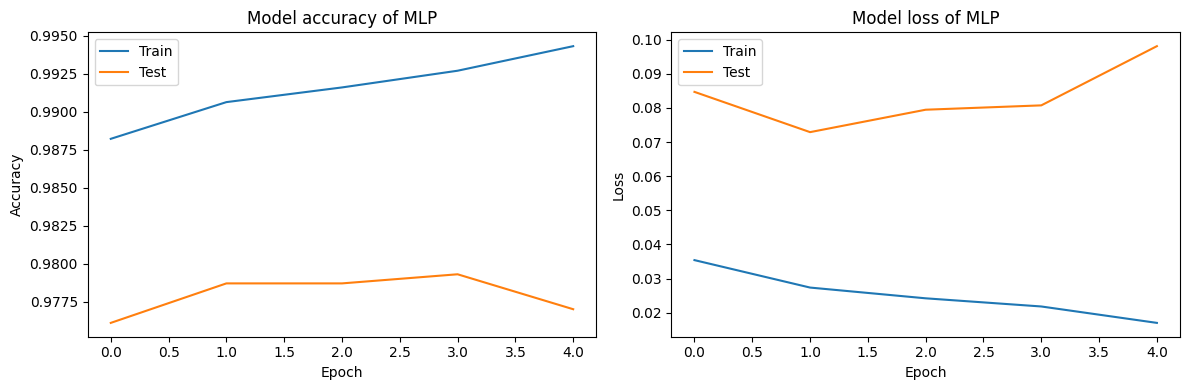

In [5]:
# Train the model and record history
hist1 = model1.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy of MLP')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss of MLP')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

We can also see from the plots of model accuracy and loss that the training accuracy is higher than the testing accuracy and the training loss is lower than the test loss and this is expected becuase unseen data is being passed to the model and it can be exusable to lose some of the interprations of features or noise that the model had not been trained on.

# Convolutional Model

In [79]:
# Load and preprocess the MNIST dataset
(train_imagec, train_labelc), (test_imagec, test_labelc) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_imagec, test_imagec = train_imagec / 255.0, test_imagec / 255.0

# Flatten the images and one-hot encode the labels
train_imagec = train_imagec.reshape((60000, 28, 28, 1))
test_imagec = test_imagec.reshape((10000, 28, 28, 1))
train_labelc = to_categorical(train_labelc)
test_labelc = to_categorical(test_labelc)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))




In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
hist2 = model.fit(train_imagec, train_labelc, epochs=5, validation_data=(test_imagec, test_labelc))

# Evaluate the model on the test set
test_loss2, test_acc2 = model.evaluate(test_imagec, test_labelc)
print(f'Test accuracy of Convolutional Model: {test_acc2}')


Epoch 1/5
1875/1875 [==============================] - 75s 39ms/step - loss: 0.1397 - accuracy: 0.9566 - val_loss: 0.0427 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0332 - val_accuracy: 0.9892
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0327 - accuracy: 0.9898 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0373 - val_accuracy: 0.9879
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 0.0347 - accuracy: 0.9896
Test accuracy of Convolutional Model: 0.9896000027656555


In the convolutional model the validation accuracy is less that the training accuracy this is a good insight because at least the prelimninary findings show that the model is not doing any lucky guesses. This is expected as well as the validation loss being higher than that of the training. And the timings of the range of epochs is between 32 milli second per step to 43 milli second per step.

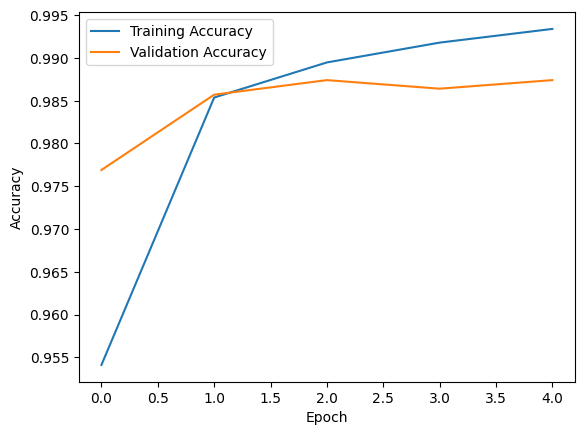

In [ ]:
# Plot training history
plt.plot(hist2.history['accuracy'], label='Training Accuracy')
plt.plot(hist2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation accuracies of Convolutional Model')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

From the plots above also we can see that the validation accuracy plot does not go over the training plot. It has to be this way for the model to be considered performing and generalizing well.  

# AutoEncoders

In [80]:
# Define the autoencoder model
def build_autoencoder_1():
    # Autoencoder with dense layers
    input_img = layers.Input(shape=(28, 28, 1))
    flat_img = layers.Flatten()(input_img)

    encoded = layers.Dense(128, activation='relu')(flat_img)
    encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(encoded)

    decoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(128, activation='relu')(decoded)
    decoded = layers.Dense(784, activation='sigmoid')(decoded)
    decoded_img = layers.Reshape((28, 28, 1))(decoded)

    autoencoder = models.Model(input_img, decoded_img)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder

def build_autoencoder_2():
    # Autoencoder with convolutional layers
    input_img = layers.Input(shape=(28, 28, 1))

    encoded = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(encoded)

    decoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(16, (3, 3), activation='relu')(decoded)
    decoded = layers.UpSampling2D((2, 2))(decoded)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

    return autoencoder



In the code above I began to build my two autoencoders and defining the models as main functions and having each of their  layers and parameters as their rspective local functions. Then I returned autoencoder so it does not print anything.

In [81]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter data for digit 3 and some fraction of every other digit
digit_to_keep = 3
fraction_to_keep = 0.2

indices_digit_3 = np.where(y_train == digit_to_keep)[0]
indices_other_digits = np.where(y_train != digit_to_keep)[0]

# Randomly select a fraction of indices for other digits
selected_indices_other_digits = np.random.choice(
    indices_other_digits,
    size=int(fraction_to_keep * len(indices_other_digits)),
    replace=False
)

# Concatenate indices for digit 3 and the selected fraction of other digits
selected_indices = np.concatenate([indices_digit_3, selected_indices_other_digits])

# Separate the data into training and validation sets
x_train_filtered = x_train[selected_indices]
y_train_filtered = y_train[selected_indices]

# Normalize pixel values to be between 0 and 1
x_train_filtered = x_train_filtered / 255.0

# Display the shapes of the filtered datasets
print("Filtered Training Data Shape:", x_train_filtered.shape)
print("Filtered Training Labels Shape:", y_train_filtered.shape)

Filtered Training Data Shape: (16904, 28, 28)
Filtered Training Labels Shape: (16904,)


In this problem after filtering the data for the number 3 digits and fraction every other digits. I joined them to form one single array and I printed the shapes of the of the data and the labels to make sure that I will not run into any issues in my analysis. For example empty list, different dimensions etc.

In [82]:
from sklearn.model_selection import KFold

# Implement cross-validation on the remaining training data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(x_train_filtered)):
    # Build the autoencoder model
    autoencoder_1 = build_autoencoder_1()
    autoencoder_2 = build_autoencoder_2()

    # Split the data into training and validation sets for this fold
    train_data, val_data = x_train_filtered[train_index], x_train_filtered[val_index]

Here I did a for loop to implement a 5 fold cross validation which is to implented on unseen data to improve the feature learning of the data.

In [84]:
# Build and train the first autoencoder
autoencoder_1 = build_autoencoder_1()
autoencoder_1.fit(train_data, train_data,
                  epochs=10,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(val_data, val_data))

# Build and train the second autoencoder
autoencoder_2 = build_autoencoder_2()
autoencoder_2.fit(train_data, train_data,
                  epochs=10,
                  batch_size=128,
                  shuffle=True,
                  validation_data=(val_data, val_data))




Epoch 1/10
106/106 [==============================] - 3s 18ms/step - loss: 0.3221 - val_loss: 0.2386
Epoch 2/10
106/106 [==============================] - 2s 19ms/step - loss: 0.2094 - val_loss: 0.1850
Epoch 3/10
106/106 [==============================] - 2s 18ms/step - loss: 0.1756 - val_loss: 0.1678
Epoch 4/10
106/106 [==============================] - 2s 17ms/step - loss: 0.1604 - val_loss: 0.1538
Epoch 5/10
106/106 [==============================] - 2s 15ms/step - loss: 0.1495 - val_loss: 0.1469
Epoch 6/10
106/106 [==============================] - 2s 15ms/step - loss: 0.1428 - val_loss: 0.1405
Epoch 7/10
106/106 [==============================] - 2s 14ms/step - loss: 0.1371 - val_loss: 0.1356
Epoch 8/10
106/106 [==============================] - 1s 14ms/step - loss: 0.1322 - val_loss: 0.1314
Epoch 9/10
106/106 [==============================] - 1s 12ms/step - loss: 0.1282 - val_loss: 0.1274
Epoch 10/10
106/106 [==============================] - 3s 32ms/step - loss: 0.1249 - val_lo

Here we can see how the cross validation is minimizing the loss

In [85]:
# Evaluate the autoencoder on the validation set
val_loss = autoencoder_1.evaluate(val_data, val_data)
print(f"Fold {fold + 1} - Validation Loss: {val_loss}")

106/106 [==============================] - 0s 3ms/step - loss: 0.1243
Fold 5 - Validation Loss: 0.12430873513221741


Across 5 fold CV we have the least loss on our data in our autoencoder_1

In [86]:
# Evaluate the autoencoder on the validation set
val_loss_2 = autoencoder_2.evaluate(val_data, val_data)
print(f"Fold {fold + 1} - Validation Loss: {val_loss_2}")

106/106 [==============================] - 1s 13ms/step - loss: 0.1293
Fold 5 - Validation Loss: 0.12928225100040436


autoencoder_2 also performed very well and gave almost the same loss value as the first in learning the features of these digits.


In [87]:
# Evaluate the autoencoders on the test set
decoded_imgs_1 = autoencoder_1.predict(val_data)
decoded_imgs_2 = autoencoder_2.predict(val_data)


106/106 [==============================] - 2s 15ms/step


So now I am just predicting on test data so that I can make plots to visualize the results.

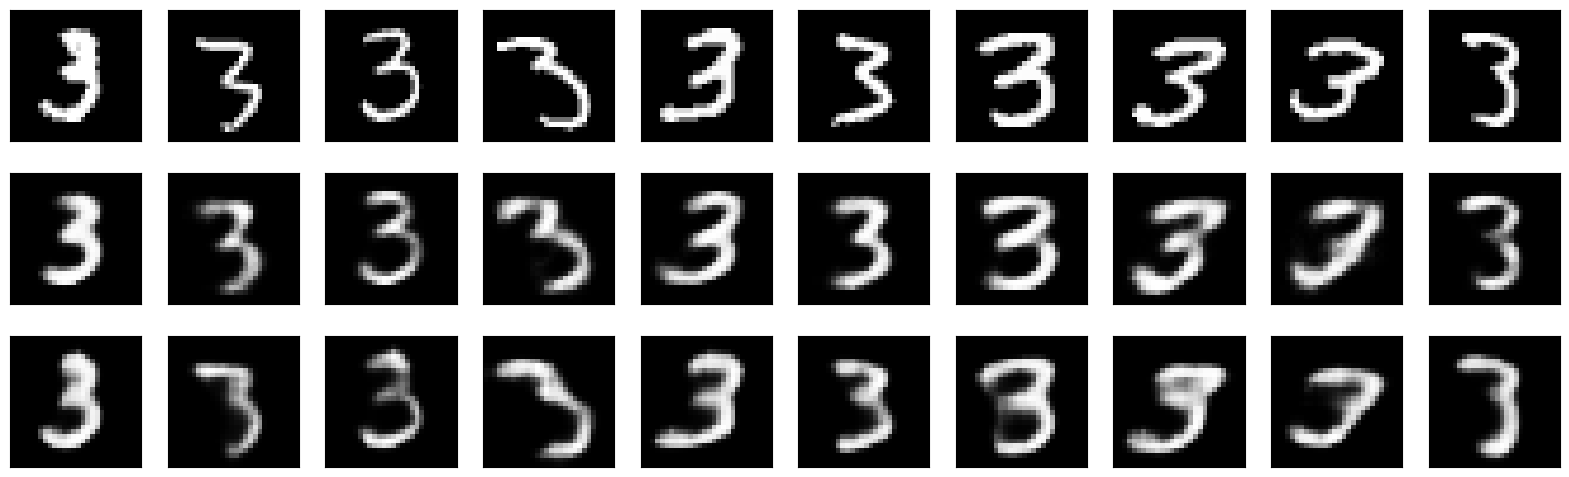

In [88]:
# Display a few original and reconstructed images for both autoencoders
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(val_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images for autoencoder 1
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs_1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images for autoencoder 2
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

So here we can see that both models performed very well in predicting the number 3 in 10 instances and although they do not all look like the same hand writing my model was able to greatly learn these features and allow us to resconstruct them almost exactly as the original images.

Also the AutoEncoder does feature learning through dimensionality reduction so that is why the reconstructed images are a little blurrier that the original.


So Finally, my models performed very well on test sets eventhough these were previously unseen data to the model.
This is expected because the model was trained well and with the ability of the neural networks to perform backward propagation also allows me to minize loss.